In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import pandas as pd
import scipy.stats as sci
import numpy as np
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 300)

In [2]:
with open('df.pickle','rb') as file:
    df=pickle.load(file)
df.head(10)

,country,year,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,gdp,population,excess_carbon
2,Armenia,1992,EFConsPerCap,0.390923,0.189137,0.000001,0.004138,0.033669,1.112225,949.033,3449000,1.112224
12,Armenia,1993,EFConsPerCap,0.386611,0.200749,0.000011,0.003816,0.031968,0.535277,886.033,3370000,0.535266
22,Armenia,1994,EFConsPerCap,0.445495,0.317448,0.000023,0.003766,0.031476,0.317669,956.471,3290000,0.317646
32,Armenia,1995,EFConsPerCap,0.380362,0.196215,0.000017,0.003926,0.031497,0.416180,1043.540,3223000,0.416163
42,Armenia,1996,EFConsPerCap,0.441648,0.223205,0.000022,0.003030,0.035410,0.334686,1121.880,3173000,0.334663
52,Armenia,1997,EFConsPerCap,0.399044,0.258338,0.009432,0.003457,0.028456,0.409646,1172.140,3138000,0.400214
62,Armenia,1998,EFConsPerCap,0.463829,0.214603,0.002064,0.004773,0.035842,0.432529,1267.580,3113000,0.430465
72,Armenia,1999,EFConsPerCap,0.381901,0.200030,0.002305,0.006621,0.034720,0.520854,1317.740,3094000,0.518550
82,Armenia,2000,EFConsPerCap,0.409554,0.199877,0.014420,0.008785,0.029599,0.482025,1404.320,3076000,0.467605
92,Armenia,2001,EFConsPerCap,0.434052,0.201980,0.038790,0.008356,0.038893,0.501807,1548.080,3060000,0.463016


In [3]:
df.shape

(5413, 12)

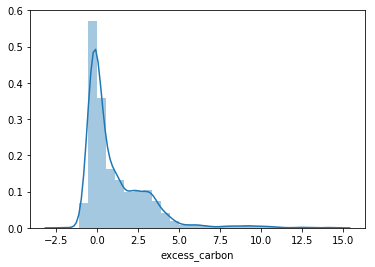

In [4]:
sns.distplot(df['excess_carbon'], bins=30,)
df['excess_carbon'].describe()
df['%fishing2built']=df['fishing_ground']/df['built_up_land']
df['fishingnbuilt']=df['fishing_ground']*df['built_up_land']
df['fishingandgraze']=df['fishing_ground']*df['grazing_land']
df['fishyear']=df['fishing_ground']*df['year']
df['fishgdp']=df['fishing_ground']*df['gdp']
df['percapbuilt']=df['built_up_land']/df['population']
df['percapfish']=df['fishing_ground']/df['population']

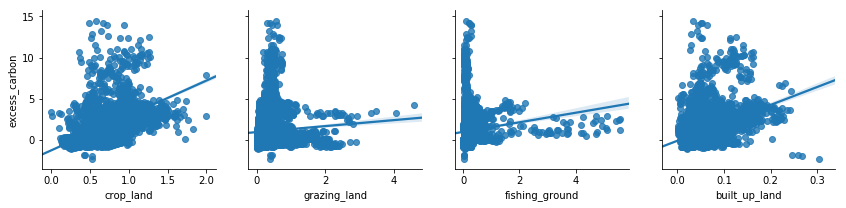

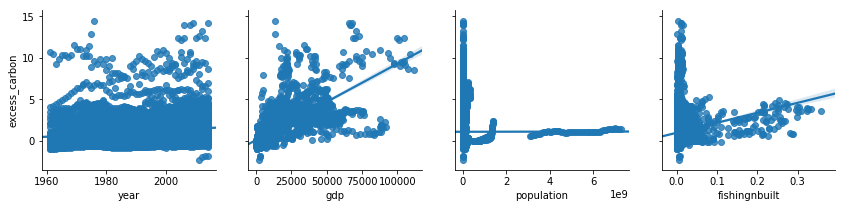

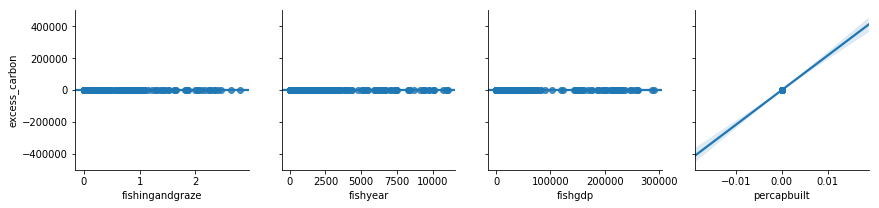

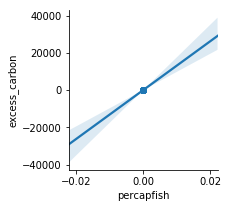

In [5]:
features=['crop_land','grazing_land','fishing_ground','built_up_land','year','gdp','population','fishingnbuilt','fishingandgraze','fishyear','fishgdp','percapbuilt','percapfish']
n = 4
row_groups= [features[i:i+n] for i in range(0, len(features), n) ]
# sns.lmplot(x='crop_land', y='carbon',data=dfa,fit_reg=True)
for i in row_groups:
    sns.pairplot(data=df, y_vars=['excess_carbon'],x_vars=i,kind='reg',height=3)

In [116]:
df['excess_carbon'].describe()
# dfa.hist(column=['carbon'], bins=30)

count    5413.000000
mean        1.101029
std         1.939608
min        -2.243538
25%        -0.195407
50%         0.332462
75%         1.995058
max        14.476730
Name: excess_carbon, dtype: float64

In [117]:
df['crop_and_built']=df['crop_land']*df['built_up_land']
df=df[df['excess_carbon']<=15]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['excess_carbon_scaled'] = scaler.fit_transform(df[['excess_carbon']])

In [ ]:
# sns.pairplot(data=dfa)
sns.PairGrid(df).map(plt.scatter)

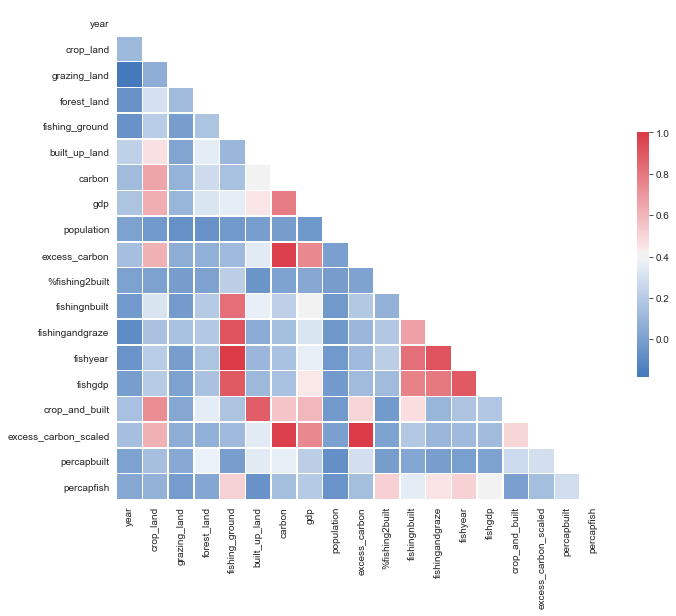

In [103]:
corr=df.corr()
def CorrMtx(df, dropDuplicates = True):

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(corr, dropDuplicates = True)


,country,year,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,gdp,population,excess_carbon,crop_and_built,cropgdp,excess_carbon_scaled,builtgdp
2,Armenia,1992,EFConsPerCap,0.390923,0.189137,0.000001,0.004138,0.033669,1.112225,949.033,3449000,1.112224,0.013162,370.998394,0.021591,31.952547
12,Armenia,1993,EFConsPerCap,0.386611,0.200749,0.000011,0.003816,0.031968,0.535277,886.033,3370000,0.535266,0.012359,342.550039,-0.274388,28.324343
22,Armenia,1994,EFConsPerCap,0.445495,0.317448,0.000023,0.003766,0.031476,0.317669,956.471,3290000,0.317646,0.014022,426.102735,-0.386027,30.105404
32,Armenia,1995,EFConsPerCap,0.380362,0.196215,0.000017,0.003926,0.031497,0.416180,1043.540,3223000,0.416163,0.011980,396.923057,-0.335488,32.868745
42,Armenia,1996,EFConsPerCap,0.441648,0.223205,0.000022,0.003030,0.035410,0.334686,1121.880,3173000,0.334663,0.015639,495.475734,-0.377297,39.725853


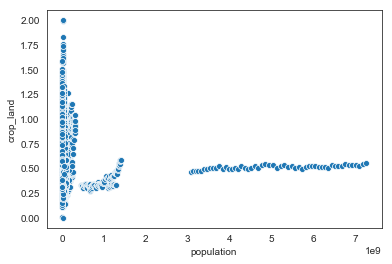

In [78]:
df['cropgdp']=df['crop_land']*df['gdp']
df['builtgdp']=df['gdp']*df['built_up_land']
df.head()

In [6]:
model=smf.ols('excess_carbon~gdp+crop_land+percapbuilt+fishing_ground',data=df).fit() #R-sq: 62.2% all pvals low (0.00)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          excess_carbon   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     2853.
Date:                Wed, 21 Aug 2019   Prob (F-statistic):               0.00
Time:                        14:23:29   Log-Likelihood:                -8195.0
No. Observations:                5413   AIC:                         1.640e+04
Df Residuals:                    5408   BIC:                         1.643e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.6845      0.035    -19.806      0.000      -0.752      -0.617
gdp              7.01e-05   1.32e-06     53.260      0.000    6.75e-05    7.27e-05
crop_land          1.6966      0.067     25.256      0.000       1.565       1.828
percapbuilt      1.18e+07   3.89e+05     30.290      0.000     1.1e+07    1.26e+07
fishing_ground    -0.6655      0.040    -16.844      0.000      -0.743      -0.588
==============================================================================
Omnibus:                     2678.672   Durbin-Watson:                   0.217
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            52632.182
Skew:                           1.903   Prob(JB):                         0.00
Kurtosis:                      17.794   Cond. No.                     4.98e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.98e-12. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
fig, ax = plt.subplots(figsize=(30,21))
fig = sm.graphics.influence_plot(model, ax=ax, criterion="cooks")

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

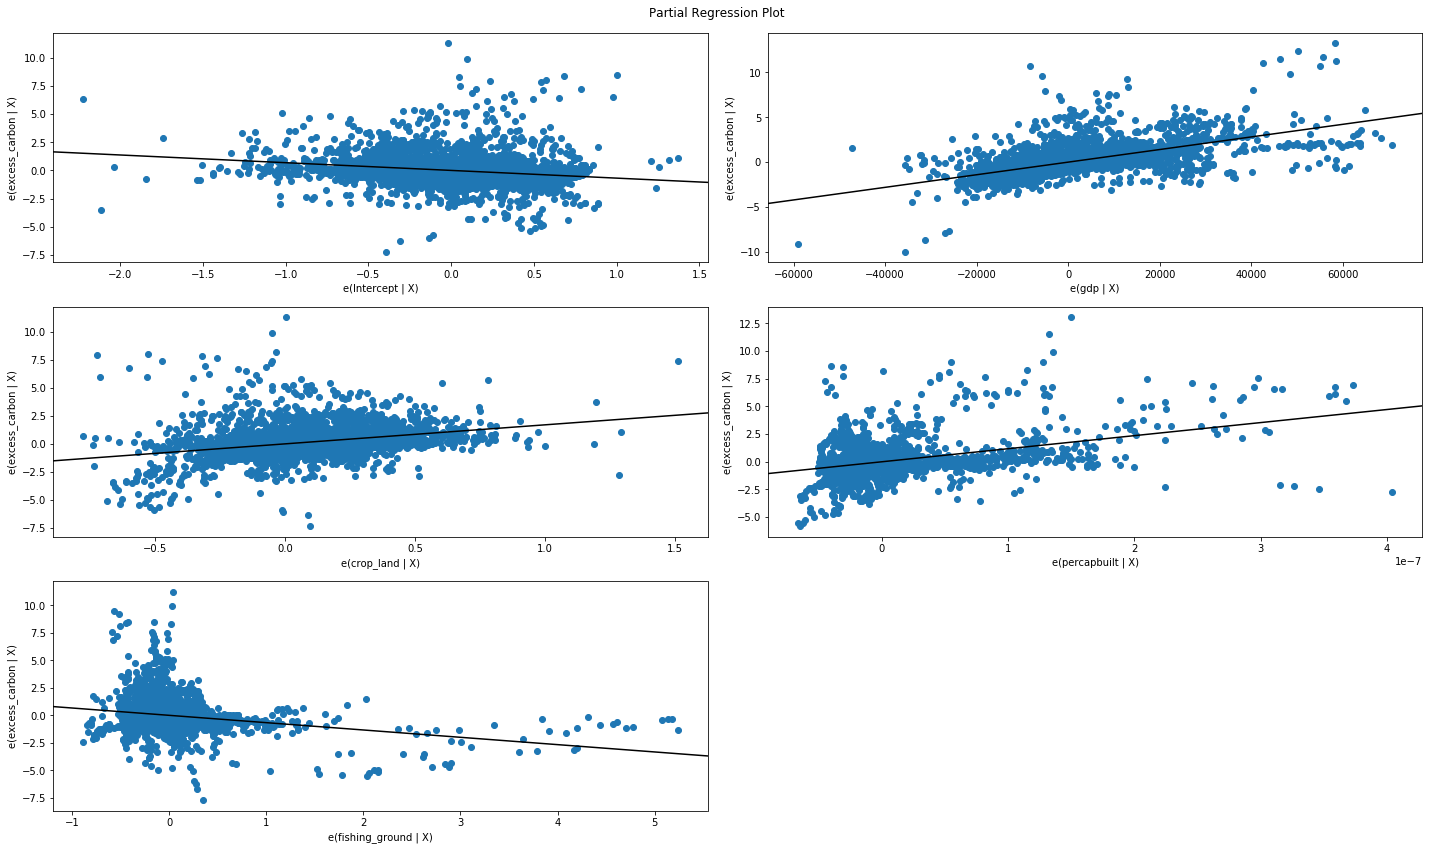

In [7]:
fig = plt.figure(figsize=(20,12))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

In [ ]:
fig = plt.figure(figsize=(20,12))
fig = df.boxplot()